# <center> Hierarchical K-Means: Construction of Hashing Tree <center>

Hierarchical clustering is the hierarchical decomposition of the data based on group 
similarities. It allows us to build tree structures from data similarities and see how different subclusters relate to each other, and how far apart data points are. It gives us a tree-type structure 
based on the hierarchical series of nested clusters. A diagram called Dendrogram graphically 
represents this hierarchy and is an inverted tree that describes the order in which factors are 
merged, or clusters are broken apart

### Question:
Perform Hierarchical Clustering from scratch and also using sklearn to perform wholesale 
customer segmentation based on their annual spending on products. You can use this dataset. 
Use the threshold to
1. Divide the dataset into two clusters. 
2. To divide the dataset into k clusters, such that the distance between the two clusters is greater
than a given threshold (this threshold can be anything passed to the function).
Dataset Link: Wholesale customers data
https://archive.ics.uci.edu/ml/machine-learningdatabases/00292/Wholesale%20customers%20data.cs

### Steps:
- Importing the libraries
- Load the dataset
- Drop the 'Channel' and 'Region' columns
- Standadizing the data
- Hierarchical Clustering from Scratch
- Sklearn Hierarchical Clustering
- Plot the results


### Importing the libraries

In [21]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage,dendrogram


### Load the Dataset

In [22]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
data=pd.read_csv(url)

In [23]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### Data Preprocessing

In [24]:
data.info

<bound method DataFrame.info of      Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4

In [25]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [26]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [27]:
# Drop the 'Channel' and 'Region' columns as we're focusing on customer spending
data.drop(['Channel','Region'],axis=1,inplace=True)

In [28]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


### Hierarchical Clustering from the scratch

In [29]:
def hierarchical_clustering_scratch(data, num_clusters):
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    
    # Calculate pairwise distances using Euclidean distance
    distances = np.linalg.norm(scaled_data[:, np.newaxis] - scaled_data, axis=2)
    
    # Initialize each data point as a cluster
    clusters = [[i] for i in range(len(data))]
    
    # Perform hierarchical clustering
    while len(clusters) > num_clusters:
        min_dist = np.inf
        merge_indices = None
        
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                cluster_i = clusters[i]
                cluster_j = clusters[j]
                dist = np.mean(distances[np.ix_(cluster_i, cluster_j)])
                
                if dist < min_dist:
                    min_dist = dist
                    merge_indices = (i, j)
        
        i, j = merge_indices
        clusters[i] += clusters[j]
        del clusters[j]
    
    return clusters

num_clusters = 2
clusters_scratch = hierarchical_clustering_scratch(data, num_clusters)
print("Clusters from scratch:", clusters_scratch)


Clusters from scratch: [[0, 5, 281, 138, 243, 180, 373, 177, 18, 127, 30, 20, 300, 226, 279, 421, 41, 140, 294, 25, 423, 434, 323, 424, 33, 311, 142, 54, 241, 324, 232, 422, 149, 255, 380, 402, 89, 276, 210, 332, 234, 267, 3, 278, 99, 398, 397, 130, 229, 249, 222, 261, 88, 143, 337, 50, 64, 292, 383, 223, 270, 390, 329, 414, 263, 257, 72, 76, 252, 339, 68, 179, 6, 84, 19, 60, 297, 408, 8, 55, 51, 167, 295, 363, 117, 139, 147, 260, 419, 178, 256, 185, 21, 326, 400, 186, 148, 169, 316, 219, 344, 364, 367, 227, 250, 350, 348, 31, 386, 121, 291, 69, 199, 366, 133, 246, 374, 286, 405, 80, 308, 224, 134, 146, 135, 192, 194, 168, 361, 206, 369, 238, 375, 34, 362, 439, 97, 98, 154, 131, 203, 299, 355, 327, 352, 275, 184, 79, 290, 151, 391, 433, 274, 280, 378, 320, 271, 95, 317, 174, 204, 233, 392, 359, 235, 428, 11, 394, 116, 318, 15, 104, 132, 225, 27, 58, 336, 191, 288, 122, 247, 220, 269, 105, 150, 307, 26, 115, 385, 90, 389, 395, 78, 388, 399, 236, 119, 313, 110, 113, 198, 321, 330, 314, 1

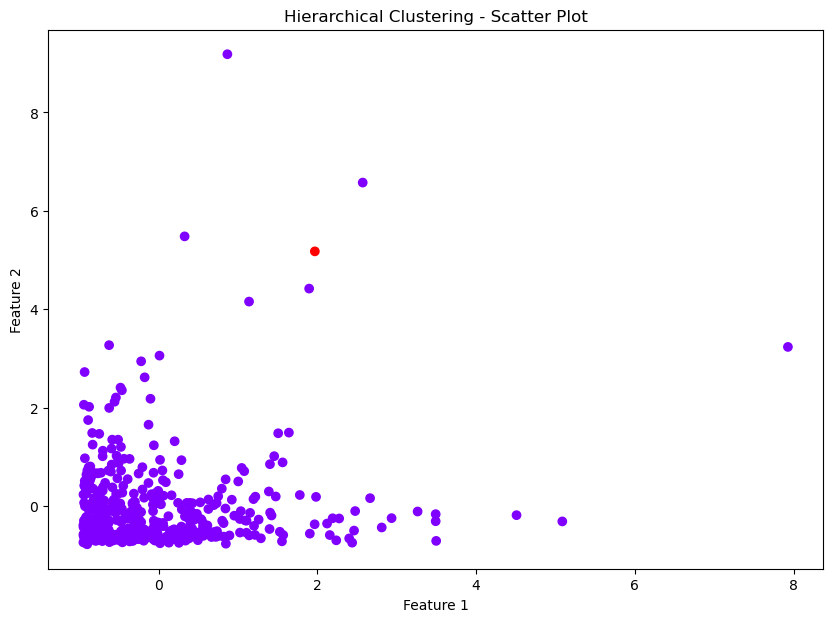

In [35]:
# Convert clusters to a flat list of cluster assignments for each data point
cluster_assignments = np.zeros(len(data))
for cluster_id, cluster in enumerate(clusters_scratch):
    cluster_assignments[cluster] = cluster_id

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=cluster_assignments, cmap='rainbow')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hierarchical Clustering - Scatter Plot')
plt.show()


In [30]:
def hierarchical_clustering_sklearn(data, num_clusters):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    
    model = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
    clusters_sklearn = model.fit_predict(scaled_data)
    
    return clusters_sklearn

clusters_sklearn = hierarchical_clustering_sklearn(data, num_clusters)
print("Clusters using sklearn:", clusters_sklearn)


Clusters using sklearn: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


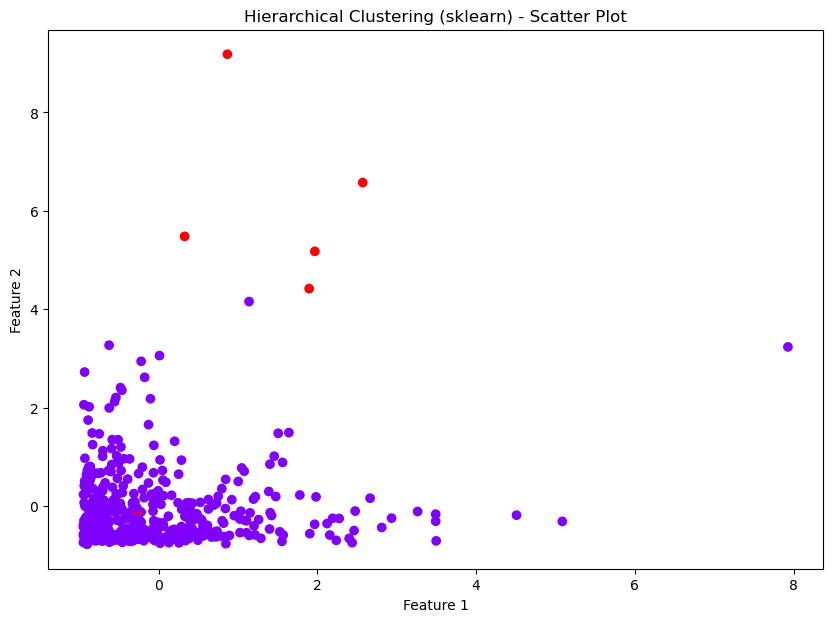

In [36]:
# Parameters
num_clusters = 2

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters_sklearn, cmap='rainbow')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hierarchical Clustering (sklearn) - Scatter Plot')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


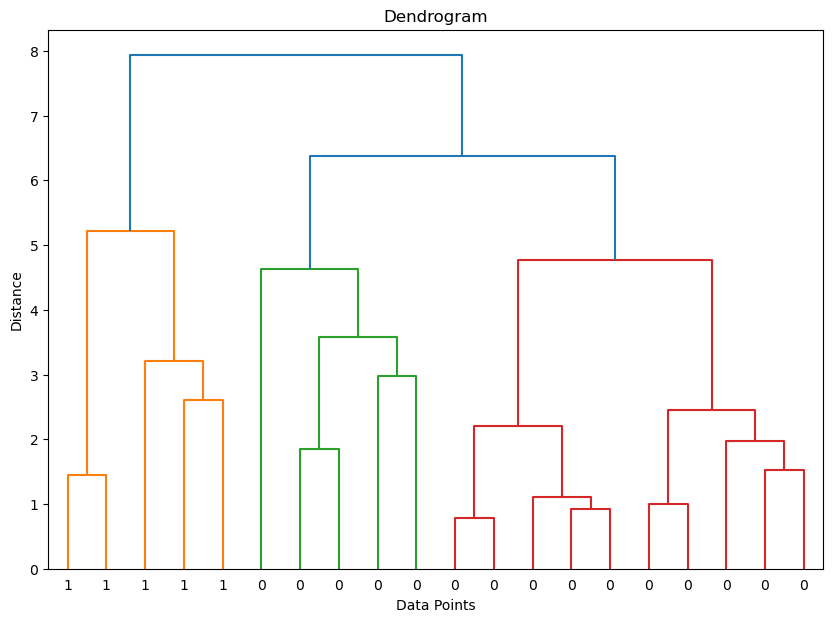

In [38]:
# Parameters
num_clusters = 2

# Perform hierarchical clustering using sklearn
clusters_sklearn = hierarchical_clustering_sklearn(data.iloc[:20], num_clusters)

# Create a dendrogram
def plot_dendrogram(data, clusters):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    
    linkage_matrix = sch.linkage(scaled_data, method='ward')
    
    plt.figure(figsize=(10, 7))
    dendrogram = sch.dendrogram(linkage_matrix, labels=clusters, leaf_font_size=10, orientation='top')
    plt.title('Dendrogram')
    plt.xlabel('Data Points')
    plt.ylabel('Distance')
    plt.show()

plot_dendrogram(data.iloc[:20], clusters_sklearn)